In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pint
import utilities as util
import deck_classes as dc

In [2]:
ureg = pint.UnitRegistry()
ureg.load_definitions('./units/lwfa_def.txt')

In [3]:
# parameters from EPOCH input file

# lengths in micrometers
# times in femtoseconds
# densities in 1/cm**3

# plasma up ramp length
url = 100 * ureg.micrometer
# plasma flat-top length
ftl = 2450 * ureg.micrometer
# plasma skin depth
psd = 2.6575 * ureg.micrometer

# grid resolution
cells_x = 1024
cells_y = 96
cells_z = 96

# moving box limits
x_min = -100 * ureg.micrometer
x_max = -50 * ureg.micrometer
#
y_min = -400 * ureg.micrometer
y_max =  400 * ureg.micrometer
#
z_min = -400 * ureg.micrometer
z_max =  400 * ureg.micrometer

# speed of the window
window_v_x =   0.29919287308 * ureg.micrometer/ureg.femtosecond
# time at which the window should start moving
window_start_time =  166.78204759999997 * ureg.femtosecond

# final simulation time
t_end =  9041.7551465 * ureg.femtosecond

In [4]:
p_min = dc.Point(x_min, y_min, z_min)
p_max = dc.Point(x_max, y_max, z_max)

shape = (cells_x, cells_y, cells_z)
ncells = dc.NrGridPoints(*shape)
winprop = dc.WindowProp(window_v_x, window_start_time, t_end)

mw = dc.MovingWindow(winprop, p_min, p_max, ncells)
dom = dc.Domain(mw)
preplasma = dc.Plasma(psd, url, ftl)
electron = dc.Species(dom, preplasma, 1e-3)

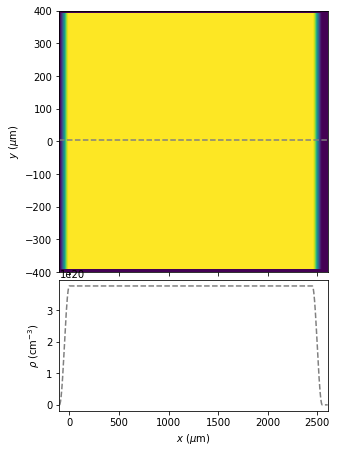

In [5]:
pm = {'cmap':'viridis', 'xlabel':r'$x$ ($\mu$m)', 'ylabel':r'$y$ ($\mu$m)', 'zlabel':r'$\rho$ (cm$^{-3}$)', 'cbar':False}
so = {'ls': '--', 'color': '0.5'}
fig = util.plot2d_wslice(np.sum(electron.rho, axis=2), dom.box.x, dom.box.y, pm, so)

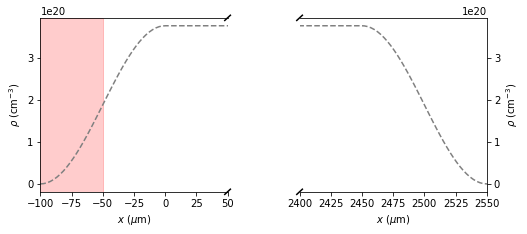

In [6]:
fig, ax = plt.subplots(figsize=(8, 3.2))
xr = dom.box.x[-1]
pm = {'xlim_left':(-preplasma.url.magnitude, 0 + 50), 'xlim_right':(preplasma.ftl.magnitude - 50, preplasma.url.magnitude + preplasma.ftl.magnitude), 'xlabel':r'$x$ ($\mu$m)', 'ylabel':r'$\rho$ (cm$^{-3}$)'}
so = {'ls': '--', 'color': '0.5'}
r = np.sum(electron.rho, axis=2)
i = r.shape[0]//2
util.plot1d_break_x(fig, dom.box.x, r[i], pm, so)
ax.axvspan(mw.box.x[0], mw.box.x[-1], alpha = 0.2, color='red');

In [ ]:
# laser parameters
# laser strength parameter
laser_a0 = 3.
laser_wavelength = 0.8 * micrometer   # ^^^
laser_omega = 2 * pi * c / laser_wavelength # ras/s
laser_frequency = laser_omega / (2*pi)
# waist at focus
laser_waist = 20 * micrometer
laser_duration = 20 * fs
# amplitude of the electric field
laser_amp = laser_a0 * laser_omega * (me * c / qe)
laser_intensity = (c * e0) / 2 * laser_amp**2
laser_power = laser_intensity * (pi * laser_waist**2 / 2)
laser_energy = laser_power * laser_duration

In [ ]:
print('f = ', convert_to(laser_frequency, terahertz).n())
print('w_0 = ', convert_to(laser_waist, micrometer))
print('E_L = ', convert_to(laser_amp, teravolt/meter).n())
print('I = ', convert_to(laser_intensity, watt/centimeter**2).n())
print('P = ', convert_to(laser_power, terawatt).n())
print('tau_0 = ', convert_to(laser_duration, femtosecond))
print('E = ', convert_to(laser_energy, joule).n())
print('lambda = ', convert_to(laser_wavelength, nanometer))